In [74]:
import pandas as pd

In [75]:
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [76]:
df = pd.concat([df1,df2,df3,df4])

In [77]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [78]:
df["LojaID"]=df["LojaID"].astype("object")
#transformacao de int para data qdo nao recebido no formato
df["Data"]=df["Data"].astype("int64")
df["Data"]=pd.to_datetime(df["Data"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
#criando a coluna receita
df["Receita"]=df["Vendas"].mul(df["Qtde"])

In [80]:
# Agrupamento da Receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

In [104]:
# Criando a Coluna mes venda e dia da venda
df["mes_venda"],df["dia_venda"] = (df["Data"].dt.month,df["Data"].dt.day)
df["Ano_Venda"] = (df["Data"].dt.year)

In [105]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
194,Natal,2019-01-02,156.47,1035,1,156.47,2019,1,2,366 days,1
234,Natal,2019-01-03,48.39,1035,2,96.78,2019,1,3,367 days,1
118,Fortaleza,2019-03-02,17.70,981,5,88.50,2019,3,2,425 days,1
68,Recife,2019-01-01,175.45,980,3,526.35,2019,1,1,365 days,1
175,Natal,2019-01-02,16.53,1036,2,33.06,2019,1,2,366 days,1


In [83]:
df["diferenca_dias"] = df ["Data"] - df["Data"].min()

In [84]:
df["trimestre_venda"] = df["Data"].dt.quarter

In [85]:
venda_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month ==3)]

In [86]:
venda_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
136,Fortaleza,2019-03-02,39.09,982,4,156.36,NaN,3,2,425 days,1
118,Recife,2019-03-02,17.70,981,5,88.50,NaN,3,2,425 days,1
116,Recife,2019-03-02,79.10,982,2,158.20,NaN,3,2,425 days,1
46,Natal,2019-03-26,753.00,853,2,1506.00,NaN,3,26,449 days,1
128,Fortaleza,2019-03-02,38.70,982,4,154.80,NaN,3,2,425 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,NaN,3,2,425 days,1
141,Recife,2019-03-02,182.75,983,8,1462.00,NaN,3,2,425 days,1
42,Natal,2019-03-02,775.00,854,2,1550.00,NaN,3,2,425 days,1
130,Recife,2019-03-02,12.36,983,4,49.44,NaN,3,2,425 days,1
134,Recife,2019-03-02,195.18,980,5,975.90,NaN,3,2,425 days,1


In [87]:
df["LojaID"].value_counts(ascending=False)

983     65
1036    49
982     44
1035    44
1522    41
1037    41
1520    39
980     36
981     31
1005    30
1002    30
852     29
1523    29
1004    28
854     28
853     26
1034    23
1521    21
1003    20
Name: LojaID, dtype: int64

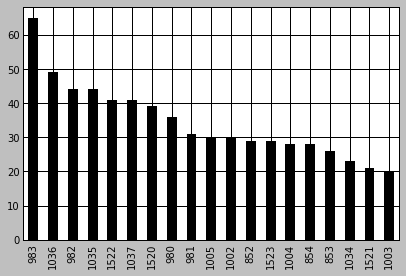

In [88]:
df["LojaID"].value_counts(ascending=False).plot.bar()

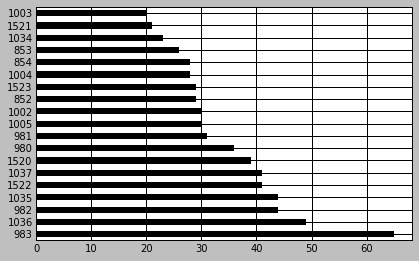

In [89]:
df["LojaID"].value_counts(ascending=False).plot.barh()

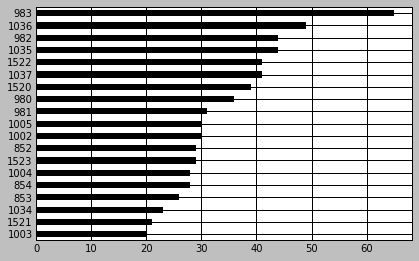

In [90]:
df["LojaID"].value_counts(ascending=True).plot.barh();

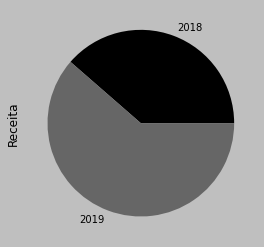

In [91]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [92]:
df["Cidade"].value_counts()

Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

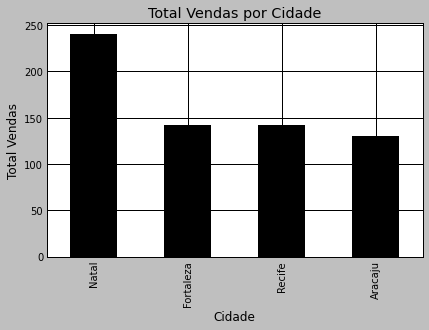

In [93]:
#Adicionar um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

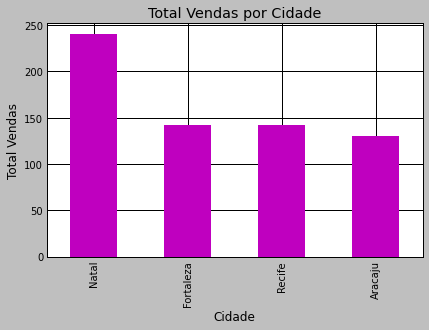

In [94]:
#Alterando a cor do grafico
df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidade", color="m")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [95]:
# Alterando o estilo
plt.style.use("ggplot")

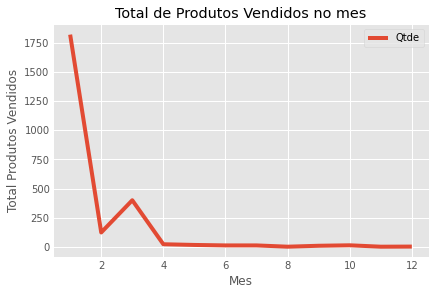

In [96]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total de Produtos Vendidos no mes")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos");
plt.legend();
plt.style.use("grayscale");

In [106]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [107]:
df_2019["mes_venda"].value_counts()

1    369
3     87
2     30
4      5
Name: mes_venda, dtype: int64

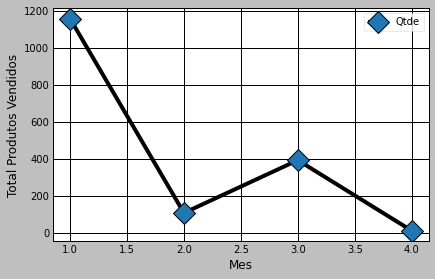

In [122]:
# Total produtos vendidos por mes
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "D" , markerfacecolor="tab:blue", markersize=15)
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

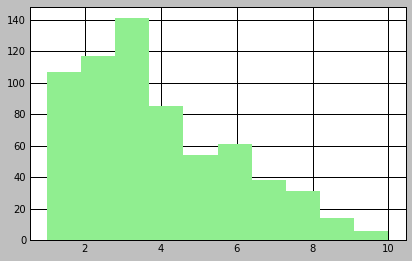

In [124]:
# Histograma
plt.hist(df["Qtde"], color="lightgreen");

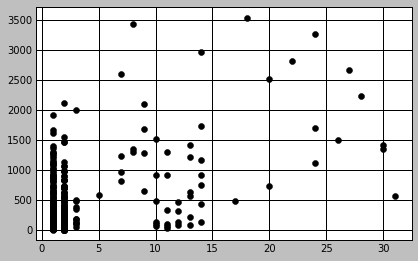

In [125]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"]);

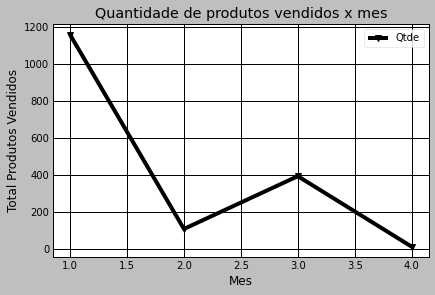

In [126]:
# Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mes")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("Grafico QTDE x MES.png")